In [ ]:
import pandas as pd

# Read the files
df_transaction = pd.read_excel('QVI_transaction_data.xlsx')
df_purchase = pd.read_csv('QVI_purchase_behaviour.csv')

# Check for nulls
print("Nulls in transaction data:\n", df_transaction.isnull().sum())
print("\nNulls in purchase behaviour data:\n", df_purchase.isnull().sum())

# Check for spaces in column names
print("\nSpaces in column names (transaction data):", [' ' in col for col in df_transaction.columns])
print("Spaces in column names (purchase behaviour data):", [' ' in col for col in df_purchase.columns])


Nulls in transaction data:
 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Nulls in purchase behaviour data:
 LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Spaces in column names (transaction data): [False, False, False, False, False, False, False, False]
Spaces in column names (purchase behaviour data): [False, False, False]


In [ ]:
# Both the dataset have no anomalise in terms of missing values so we merge the datasets
merged_df = pd.merge(df_transaction, df_purchase, on='LYLTY_CARD_NBR', how='inner')

# Output
print("Merged DataFrame shape:", merged_df.shape)
print(merged_df.head(10))

Merged DataFrame shape: (264836, 10)
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   
5  43604          4            4074    2982        57   
6  43601          4            4149    3333        16   
7  43601          4            4196    3539        24   
8  43332          5            5026    4525        42   
9  43330          7            7150    6900        52   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.

In [ ]:
#The date column is  not showing date as intended , so we change the date format
merged_df['DATE'] = pd.to_numeric(merged_df['DATE'], errors='coerce')

# Convert from Excel serial to datetime using Timedelta
excel_epoch = pd.to_datetime('1899-12-30')
merged_df['DATE'] = excel_epoch + pd.to_timedelta(merged_df['DATE'], unit='D', errors='coerce')

# Format to dd-mm-yyyy, handling potential NaT values
merged_df['DATE'] = merged_df['DATE'].dt.strftime('%d-%m-%Y').fillna('')


# Check result
print(merged_df['DATE'].head())

0    17-10-2018
1    14-05-2019
2    20-05-2019
3    17-08-2018
4    18-08-2018
Name: DATE, dtype: object


In [ ]:
print(merged_df['DATE'].head(10))

0    17-10-2018
1    14-05-2019
2    20-05-2019
3    17-08-2018
4    18-08-2018
5    19-05-2019
6    16-05-2019
7    16-05-2019
8    20-08-2018
9    18-08-2018
Name: DATE, dtype: object


In [ ]:
# Remove rows where 'salsa' appears in PROD_NAME as we are only dealing with CHips
merged_df = merged_df[~merged_df['PROD_NAME'].str.contains('salsa', case=False, na=False)]

# Check result
print(merged_df['PROD_NAME'].head(100))


0        Natural Chip        Compny SeaSalt175g
1                      CCs Nacho Cheese    175g
2        Smiths Crinkle Cut  Chips Chicken 170g
3        Smiths Chip Thinly  S/Cream&Onion 175g
4      Kettle Tortilla ChpsHny&Jlpno Chili 150g
                         ...                   
103       Doritos Corn Chips  Nacho Cheese 170g
104                    Twisties Cheese     270g
105          Kettle Sensations   BBQ&Maple 150g
106                        Kettle Original 175g
107      Smiths Chip Thinly  S/Cream&Onion 175g
Name: PROD_NAME, Length: 100, dtype: object


In [ ]:
print("Full DataFrame Summary:")
print(merged_df.describe(include='all'))


Full DataFrame Summary:
              DATE      STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count       246742  246742.000000    2.467420e+05  2.467420e+05   
unique         364            NaN             NaN           NaN   
top     24-12-2018            NaN             NaN           NaN   
freq           865            NaN             NaN           NaN   
mean           NaN     135.051098    1.355310e+05  1.351311e+05   
std            NaN      76.787096    8.071528e+04  7.814772e+04   
min            NaN       1.000000    1.000000e+03  1.000000e+00   
25%            NaN      70.000000    7.001500e+04  6.756925e+04   
50%            NaN     130.000000    1.303670e+05  1.351830e+05   
75%            NaN     203.000000    2.030840e+05  2.026538e+05   
max            NaN     272.000000    2.373711e+06  2.415841e+06   

             PROD_NBR                               PROD_NAME       PROD_QTY  \
count   246742.000000                                  246742  246742.000000   
unique     

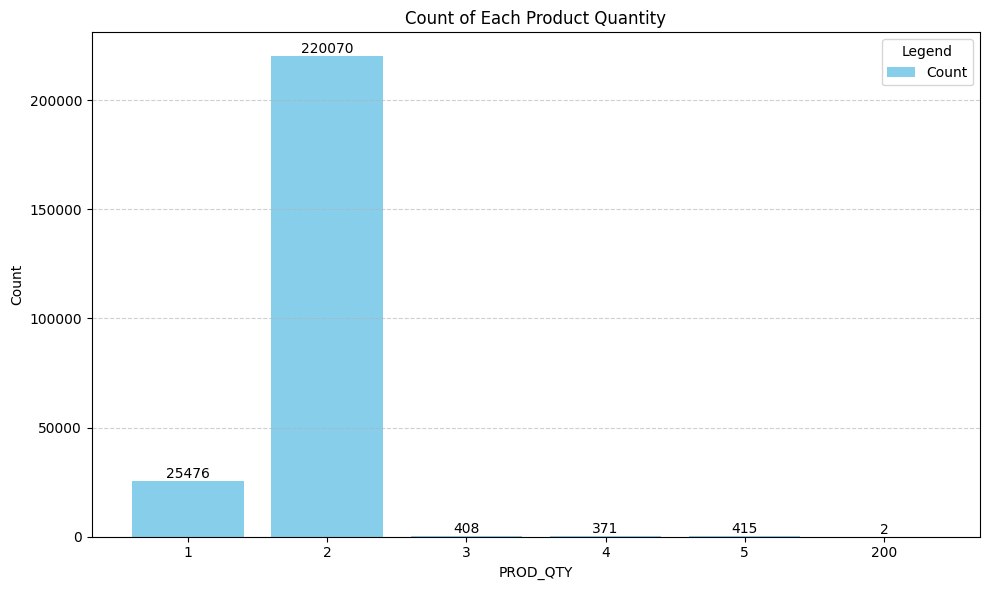

In [ ]:
import matplotlib.pyplot as plt
#Visualizing count per Product Quantity to confirm outliers
# Get actual value counts
qty_counts = merged_df['PROD_QTY'].value_counts().sort_index()

# Create plot
plt.figure(figsize=(10, 6))
bars = plt.bar(qty_counts.index.astype(str), qty_counts.values, color='skyblue', label='Count')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha='center', va='bottom', fontsize=10)

# Formatting
plt.title('Count of Each Product Quantity')
plt.xlabel('PROD_QTY')
plt.ylabel('Count')
plt.legend(title='Legend')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Get LYLTY_CARD_NBRs to exclude ouliers (ie . gretaer than 5)
high_qty_cards = merged_df[merged_df['PROD_QTY'] > 5]['LYLTY_CARD_NBR'].unique()

# Remove all their transactions
merged_df = merged_df[~merged_df['LYLTY_CARD_NBR'].isin(high_qty_cards)]

# Check result
print(f"Remaining transactions after removal: {len(merged_df)}")


Remaining transactions after removal: 246740


In [ ]:
merged_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,17-10-2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,14-05-2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,20-05-2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,17-08-2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,18-08-2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,09-03-2019,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,13-08-2018,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,06-11-2018,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,27-12-2018,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [ ]:
# Prepare data for time series plotting
#Ensure DATE is datetime
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'], format='%d-%m-%Y')

# Get full date range from min to max
full_date_range = pd.date_range(start=merged_df['DATE'].min(), end=merged_df['DATE'].max())

# Get actual dates present in the data
present_dates = merged_df['DATE'].unique()

# Find missing dates
missing_dates = full_date_range.difference(present_dates)

# Output
print(f"Total missing dates: {len(missing_dates)}")
print(missing_dates)


Total missing dates: 1
DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


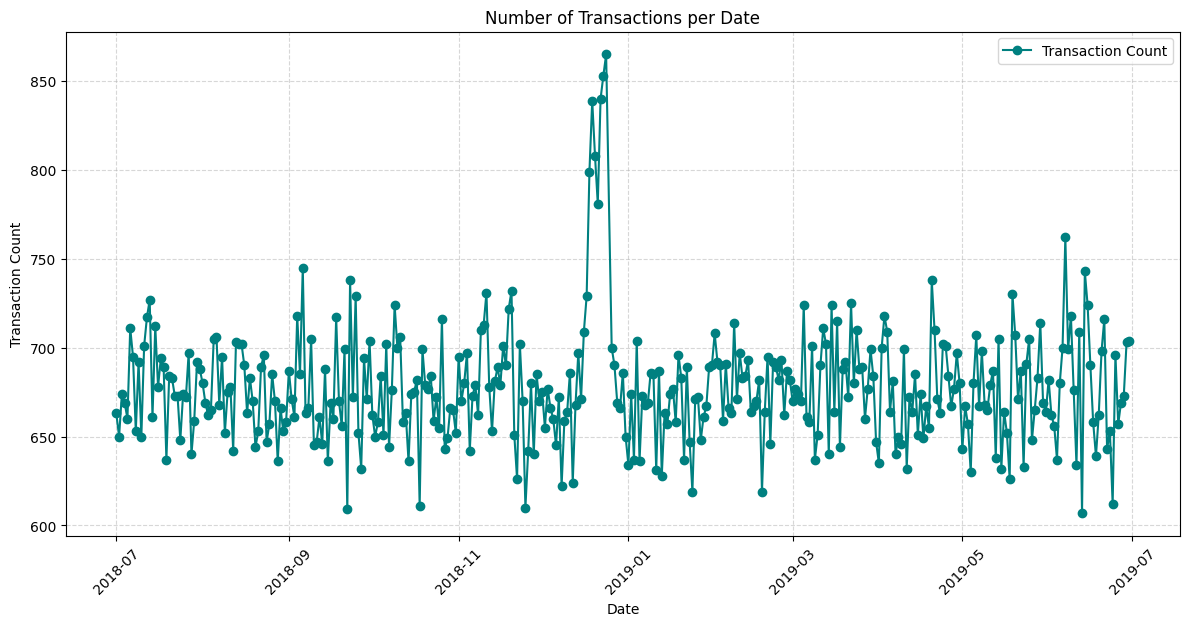

In [ ]:
# Convert DATE to datetime if it's still a string
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'], format='%d-%m-%Y')

# Count transactions per date
transactions_per_date = merged_df['DATE'].value_counts().sort_index()

#Plot
plt.figure(figsize=(12, 6))
plt.plot(transactions_per_date.index, transactions_per_date.values, marker='o', linestyle='-', color='teal', label='Transaction Count')

plt.title('Number of Transactions per Date')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [ ]:
import re

# Extract PACK_SIZE and creating new column
merged_df['PACK_SIZE'] = merged_df['PROD_NAME'].str.extract(r'(?i)(\d+\s?[g])', expand=False).str.lower()

# Remove PACK_SIZE from product name
merged_df['PRODUCT_NAME'] = merged_df['PROD_NAME'].str.replace(r'(?i)\d+\s?[g]', '', regex=True)
merged_df['PRODUCT_NAME'] = merged_df['PRODUCT_NAME'].str.replace(r'\s{2,}', ' ', regex=True).str.strip()

# Preview Data
print(merged_df[['PROD_NAME', 'PRODUCT_NAME', 'PACK_SIZE']].head())

                                  PROD_NAME  \
0    Natural Chip        Compny SeaSalt175g   
1                  CCs Nacho Cheese    175g   
2    Smiths Crinkle Cut  Chips Chicken 170g   
3    Smiths Chip Thinly  S/Cream&Onion 175g   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g   

                          PRODUCT_NAME PACK_SIZE  
0          Natural Chip Compny SeaSalt      175g  
1                     CCs Nacho Cheese      175g  
2     Smiths Crinkle Cut Chips Chicken      170g  
3     Smiths Chip Thinly S/Cream&Onion      175g  
4  Kettle Tortilla ChpsHny&Jlpno Chili      150g  


In [ ]:
merged_df.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,PRODUCT_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g,Natural Chip Compny SeaSalt
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175g,CCs Nacho Cheese
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g,Smiths Crinkle Cut Chips Chicken
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175g,Smiths Chip Thinly S/Cream&Onion
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150g,Kettle Tortilla ChpsHny&Jlpno Chili
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,330g,Smiths Crinkle Chips Salt & Vinegar
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,MIDAGE SINGLES/COUPLES,Budget,210g,Grain Waves Sweet Chilli
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,MIDAGE SINGLES/COUPLES,Budget,150g,Doritos Corn Chip Mexican Jalapeno
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,MIDAGE SINGLES/COUPLES,Budget,210g,Grain Waves Sour Cream&Chives
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,330g,Smiths Crinkle Chips Salt & Vinegar


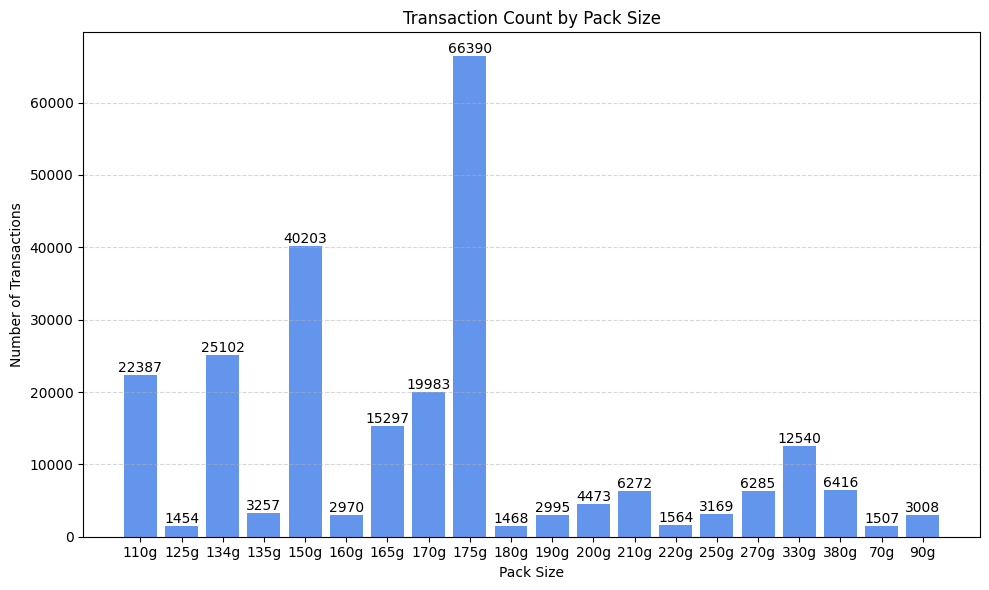

In [ ]:
# Count transactions per PACK_SIZE
pack_size_counts = merged_df['PACK_SIZE'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(pack_size_counts.index, pack_size_counts.values, color='cornflowerblue')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height),
             ha='center', va='bottom', fontsize=10)

plt.title('Transaction Count by Pack Size')
plt.xlabel('Pack Size')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

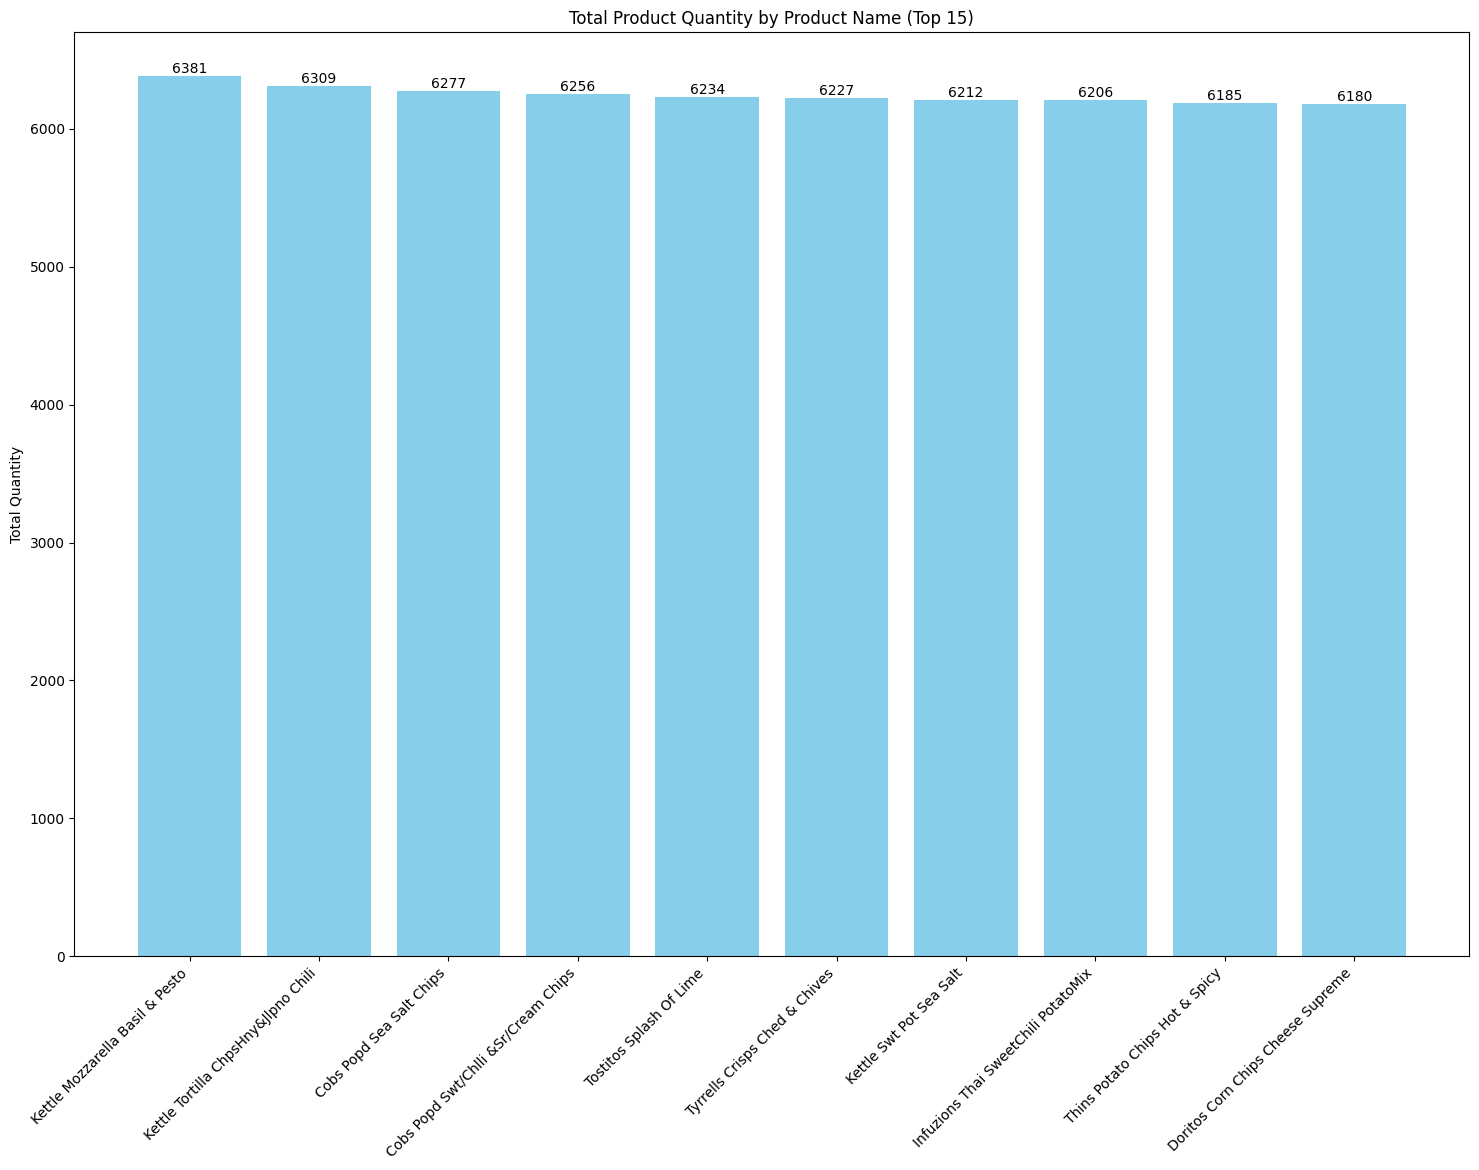

In [ ]:
plt.figure(figsize=(18, 12))

# PROD_QTY by PRODUCT_NAME (Top 10)
#plt.subplot(3, 1, 1)
prod_by_name = merged_df.groupby('PRODUCT_NAME')['PROD_QTY'].sum().sort_values(ascending=False).head(10)
bars1 = plt.bar(prod_by_name.index, prod_by_name.values, color='skyblue')
plt.title('Total Product Quantity by Product Name (Top 15)')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

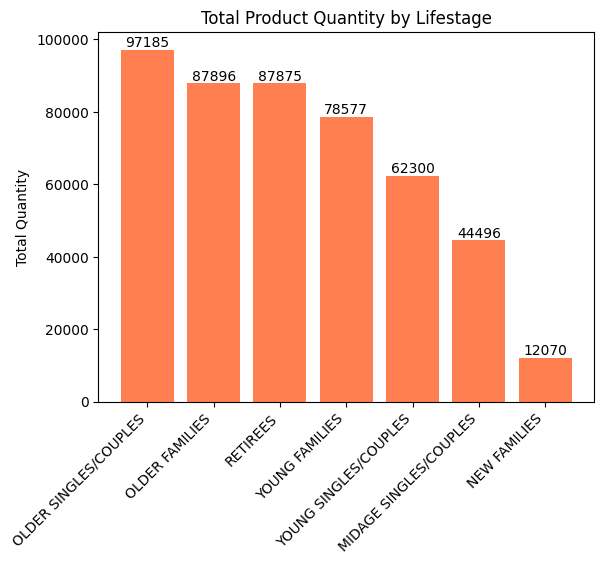

In [ ]:
#LifeSatge based aggrefation
#plt.subplot(3, 1, 2)
prod_by_lifestage = merged_df.groupby('LIFESTAGE')['PROD_QTY'].sum().sort_values(ascending=False)
bars2 = plt.bar(prod_by_lifestage.index, prod_by_lifestage.values, color='coral')
plt.title('Total Product Quantity by Lifestage')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

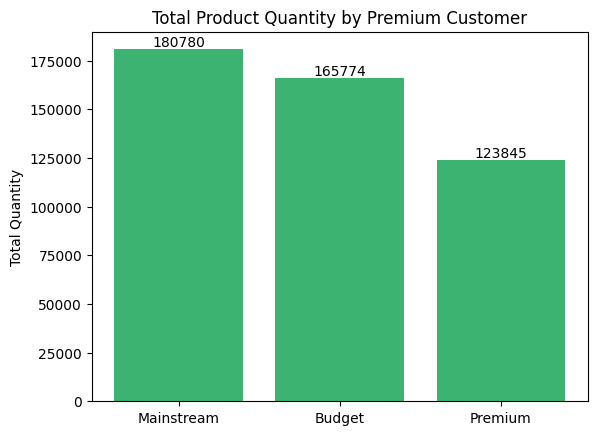

In [ ]:
#plt.subplot(3, 1, 3)
prod_by_premium = merged_df.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].sum().sort_values(ascending=False)
bars3 = plt.bar(prod_by_premium.index, prod_by_premium.values, color='mediumseagreen')
plt.title('Total Product Quantity by Premium Customer')
plt.ylabel('Total Quantity')
plt.xticks(rotation=0)
for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')


In [ ]:
# Group by LIFESTAGE and PREMIUM_CUSTOMER
segment_stats = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    unique_customers=('LYLTY_CARD_NBR', 'nunique'),
    total_quantity=('PROD_QTY', 'sum'),
    total_sales=('TOT_SALES', 'sum')
).reset_index()

# Add average quantity per customer
segment_stats['avg_qty_per_customer'] = (segment_stats['total_quantity'] / segment_stats['unique_customers']).round(2)

# Optional: add avg spend per customer
segment_stats['avg_sales_per_customer'] = (segment_stats['total_sales'] / segment_stats['unique_customers']).round(2)

# Sort the table
segment_stats_sorted = segment_stats.sort_values(by='avg_sales_per_customer', ascending=False)

# Display the sorted table
print(segment_stats_sorted)

                 LIFESTAGE PREMIUM_CUSTOMER  unique_customers  total_quantity  \
7           OLDER FAMILIES       Mainstream              2788           25804   
6           OLDER FAMILIES           Budget              4611           41853   
8           OLDER FAMILIES          Premium              2231           20239   
15          YOUNG FAMILIES           Budget              3953           34482   
17          YOUNG FAMILIES          Premium              2398           20901   
16          YOUNG FAMILIES       Mainstream              2685           23194   
11   OLDER SINGLES/COUPLES          Premium              4682           31695   
9    OLDER SINGLES/COUPLES           Budget              4849           32883   
1   MIDAGE SINGLES/COUPLES       Mainstream              3298           21213   
10   OLDER SINGLES/COUPLES       Mainstream              4858           32607   
12                RETIREES           Budget              4385           26932   
14                RETIREES  

# ***The analysis summarizes purchasing behavior across customer segments defined by LIFESTAGE and PREMIUM_CUSTOMER category. The key metrics include:***

*   Unique customers
*   Total quantity purchased
*   Total sales
*   Average quantity per customer
*   Average sales per customer







# ***Top Performing Segments (by Average Sales per Customer):***

| Segment                     | Avg Sales/Customer | Total Sales |
| --------------------------- | ------------------ | ----------- |
| Older Families - Mainstream | 34.58              | 96,414      |
| Older Families - Budget     | 34.02              | 156,864     |
| Older Families - Premium    | 33.73              | 75,243      |
| Young Families - Budget     | 32.82              | 129,718     |
| Young Families - Premium    | 32.77              | 78,572      |

These segments spend the most per customer, suggesting high purchasing power and strong product engagement.



# ***Segments with the Most Customers:***

| Segment                            | Unique Customers |
| ---------------------------------- | ---------------- |
| Young Singles/Couples - Mainstream | 7,917            |
| Retirees - Mainstream              | 6,358            |
| Older Singles/Couples - Budget     | 4,849            |

This defines the scope for targetting and future marketing startegies

# ***Lowest Performing Segments (by Average Sales per Customer):***

| Segment                         | Avg Sales/Customer | Total Sales |
| ------------------------------- | ------------------ | ----------- |
| Young Singles/Couples - Budget  | 15.66              | 57,122      |
| Young Singles/Couples - Premium | 15.75              | 39,052      |
| New Families - Premium          | 18.71              | 10,761      |

These segments represent opportunities to improve customer engagement, either through product targeting or promotional efforts.

#***Insights :***


*  Older Families Are the Most Valuable Segment :
This group consistently spends the most and buys the most. They are likely brand-loyal and responsive to value-added offers.

*   Young Families Are Strong Buyers : Especially on a Budget
Budget-conscious Young Families show high purchase volumes, indicating price sensitivity but strong demand. Promotions targeting value can perform well here.

*   New Families and Premium Shoppers Are Underperforming :
These segments have low engagement and spend. This may signal a mismatch between product offerings and their preferences, suggesting a need for repositioning or targeted communication.

*   Customer Behavior Varies Significantly by Segment :
Clear differences in quantity, spend, and frequency exist between life stages and premium tiers. A one-size-fits-all approach will likely miss important opportunities for growth.



